# Exploratory Data Analysis

In [2]:
install.packages("pastecs")
install.packages("RSQLite")
install.packages("DBI")
install.packages("dplyr")
install.packages("ggplot2")
library(pastecs)

package 'pastecs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dannyvaks\AppData\Local\Temp\RtmpUpLyQb\downloaded_packages
package 'RSQLite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'RSQLite'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\dannyvaks\.conda\envs\notebook\Lib\R\library\00LOCK\RSQLite\libs\x64\RSQLite.dll to C:\Users\dannyvaks\.conda\envs\notebook\Lib\R\library\RSQLite\libs\x64\RSQLite.dll: Permission denied"
Warning message:
"restored 'RSQLite'"



The downloaded binary packages are in
	C:\Users\dannyvaks\AppData\Local\Temp\RtmpUpLyQb\downloaded_packages
package 'DBI' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dannyvaks\AppData\Local\Temp\RtmpUpLyQb\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\dannyvaks\.conda\envs\notebook\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\dannyvaks\.conda\envs\notebook\Lib\R\library\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\dannyvaks\AppData\Local\Temp\RtmpUpLyQb\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dannyvaks\AppData\Local\Temp\RtmpUpLyQb\downloaded_packages


Warning message:
"package 'pastecs' was built under R version 3.6.2"


In [17]:
install.packages("lubridate")
library(lubridate)

package 'lubridate' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dannyvaks\AppData\Local\Temp\RtmpUpLyQb\downloaded_packages


Warning message:
"package 'lubridate' was built under R version 3.6.2"

Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date




In [4]:
library(DBI)
library(RSQLite)
options(repr.plot.width = 15, repr.plot.height = 15)



Warning message:
"package 'DBI' was built under R version 3.6.2"
Warning message:
"package 'RSQLite' was built under R version 3.6.2"


In [3]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:pastecs':

    first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 3.6.2"


In [15]:
con <- dbConnect(odbc::odbc(), .connection_string = "DSN=BoxOffice;Trusted_Connection=yes;", timeout = 10)

In [16]:
movies_ff <- dbReadTable(con,"movies_ff_v")

In [17]:
save(movies_ff, file = "../data/BoxOffice_ff.RData")

In [6]:
load("../data/BoxOffice_ff.RData")

# Main table analysis

In [7]:
stat.desc(movies_ff)
summary(movies_ff)

,movie_id,budget,original_language,popularity,release_date,runtime,runtime_cat,revenue,sw_lang_en,sw_web_presence,...,depart_Camera_female,depart_Crew_female,depart_Custom_Mkup_female,depart_Directing_female,depart_Editing_female,depart_Lighting_female,depart_Production_female,depart_Sound_female,depart_Visual_Effects_female,depart_Writing_female
,<dbl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,7.375000e+03,7.375000e+03,NA,7.375000e+03,NA,7.370000e+03,NA,2.993000e+03,7.375000e+03,7.375000e+03,...,7.341000e+03,7.341000e+03,7.341000e+03,7.341000e+03,7.341000e+03,7.341000e+03,7.341000e+03,7.341000e+03,7.341000e+03,7.341000e+03
nbr.null,0.000000e+00,2.012000e+03,NA,0.000000e+00,NA,1.900000e+01,NA,0.000000e+00,1.039000e+03,5.012000e+03,...,7.194000e+03,6.971000e+03,5.293000e+03,6.297000e+03,6.516000e+03,7.336000e+03,3.872000e+03,6.840000e+03,7.281000e+03,6.578000e+03
nbr.na,0.000000e+00,0.000000e+00,NA,0.000000e+00,NA,5.000000e+00,NA,4.382000e+03,0.000000e+00,0.000000e+00,...,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01,3.400000e+01
min,1.000000e+00,0.000000e+00,NA,1.000000e-06,NA,0.000000e+00,NA,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,7.398000e+03,3.800000e+08,NA,5.474883e+02,NA,3.380000e+02,NA,1.519558e+09,1.000000e+00,1.000000e+00,...,3.000000e+00,1.000000e+01,6.000000e+00,4.000000e+00,5.000000e+00,1.000000e+00,1.200000e+01,6.000000e+00,2.000000e+00,5.000000e+00
range,7.397000e+03,3.800000e+08,NA,5.474883e+02,NA,3.380000e+02,NA,1.519558e+09,1.000000e+00,1.000000e+00,...,3.000000e+00,1.000000e+01,6.000000e+00,4.000000e+00,5.000000e+00,1.000000e+00,1.200000e+01,6.000000e+00,2.000000e+00,5.000000e+00
sum,2.727365e+07,1.671666e+11,NA,6.298085e+04,NA,7.940970e+05,NA,2.001698e+11,6.336000e+03,2.363000e+03,...,1.500000e+02,4.730000e+02,2.595000e+03,1.127000e+03,8.930000e+02,5.000000e+00,6.898000e+03,5.810000e+02,6.200000e+01,9.120000e+02
median,3.696000e+03,8.000000e+06,NA,7.455875e+00,NA,1.040000e+02,NA,1.692814e+07,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
mean,3.698122e+03,2.266666e+07,NA,8.539777e+00,NA,1.077472e+02,NA,6.687931e+07,8.591186e-01,3.204068e-01,...,2.043318e-02,6.443264e-02,3.534941e-01,1.535213e-01,1.216456e-01,6.811061e-04,9.396540e-01,7.914453e-02,8.445716e-03,1.242338e-01


    movie_id        budget          original_language    popularity     
 Min.   :   1   Min.   :        0   Length:7375        Min.   :  0.000  
 1st Qu.:1848   1st Qu.:        0   Class :character   1st Qu.:  3.970  
 Median :3696   Median :  8000000   Mode  :character   Median :  7.456  
 Mean   :3698   Mean   : 22666657                      Mean   :  8.540  
 3rd Qu.:5550   3rd Qu.: 29000000                      3rd Qu.: 10.932  
 Max.   :7398   Max.   :380000000                      Max.   :547.488  
                                                                        
 release_date          runtime      runtime_cat           revenue         
 Length:7375        Min.   :  0.0   Length:7375        Min.   :1.000e+00  
 Class :character   1st Qu.: 94.0   Class :character   1st Qu.:2.405e+06  
 Mode  :character   Median :104.0   Mode  :character   Median :1.693e+07  
                    Mean   :107.7                      Mean   :6.688e+07  
                    3rd Qu.:118.0        

In [46]:
### frequencies of original language
table(movies_ff$original_language)



  af   ar   bm   bn   ca   cn   cs   da   de   el   en   es   fa   fi   fr   he 
   1    1    2    3    1   41    3   17   49    3 6336   95    5    3  199    6 
  hi   hu   id   is   it   ja   ka   kn   ko   ml   mr   nb   nl   no   pl   pt 
 118    4    3    1   55   90    1    1   48   12    1    1   11    5    5   13 
  ro   ru   sr   sv   ta   te   th   tr   ur   vi   xx   zh 
   8  105    3   20   31    9    5    9    2    1    2   46 

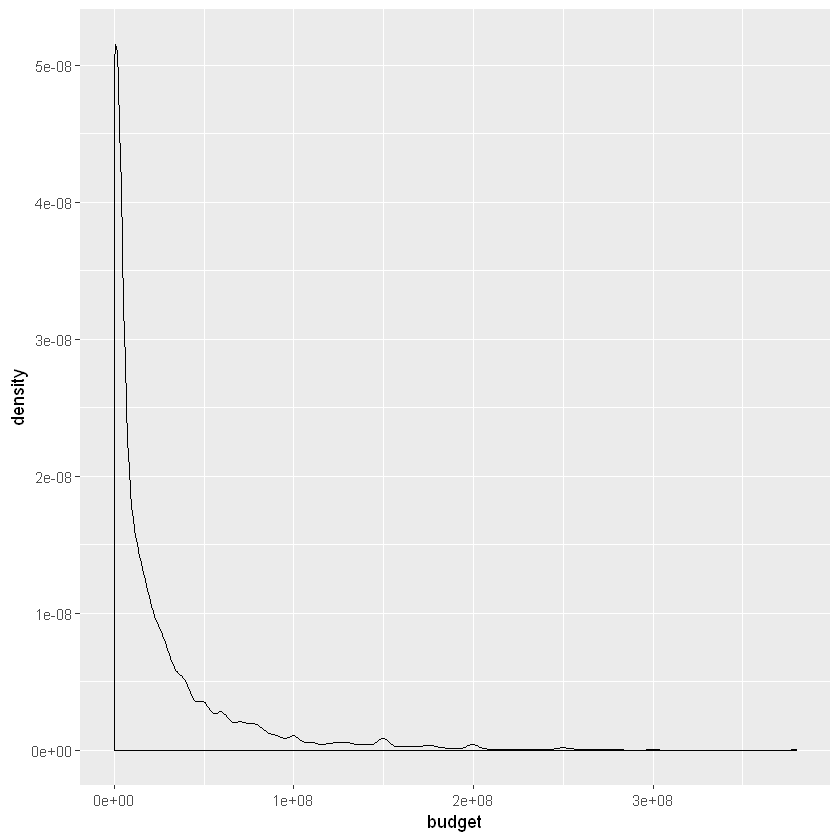

In [60]:
### budget
ggplot(data=movies_ff) +
    geom_density(aes(budget))

Warning message:
"Removed 5 rows containing non-finite values (stat_density)."


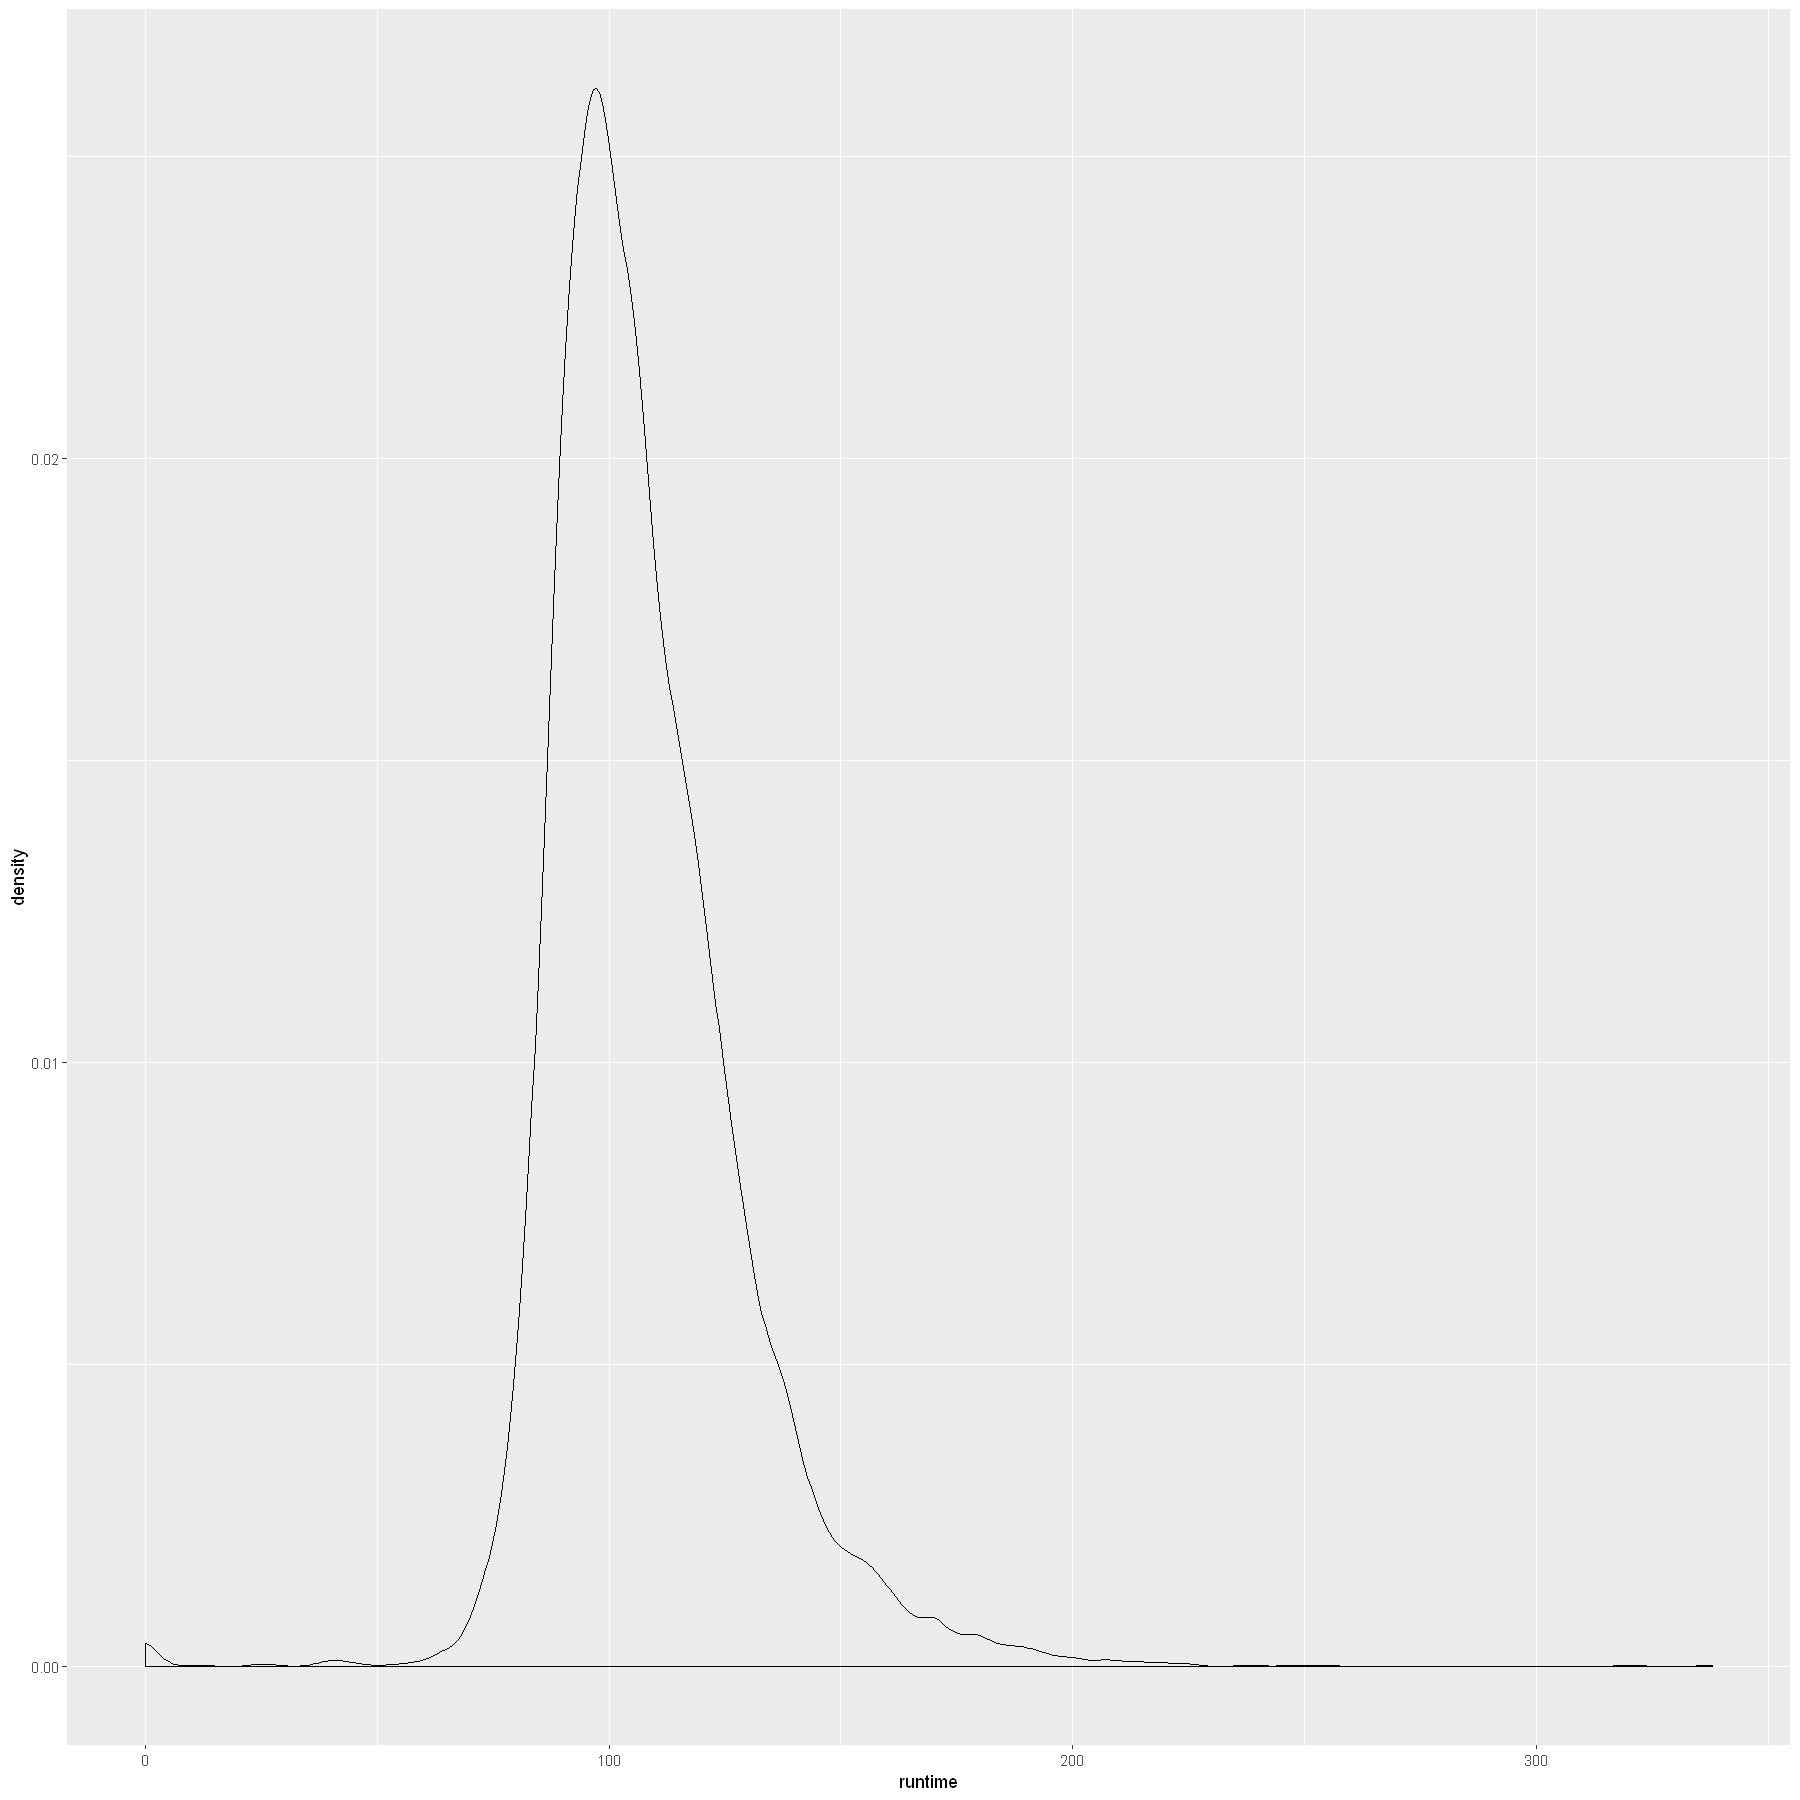

In [10]:
### runtime
ggplot(data=movies_ff) +
   geom_density(aes(x=runtime))

Selecting by n


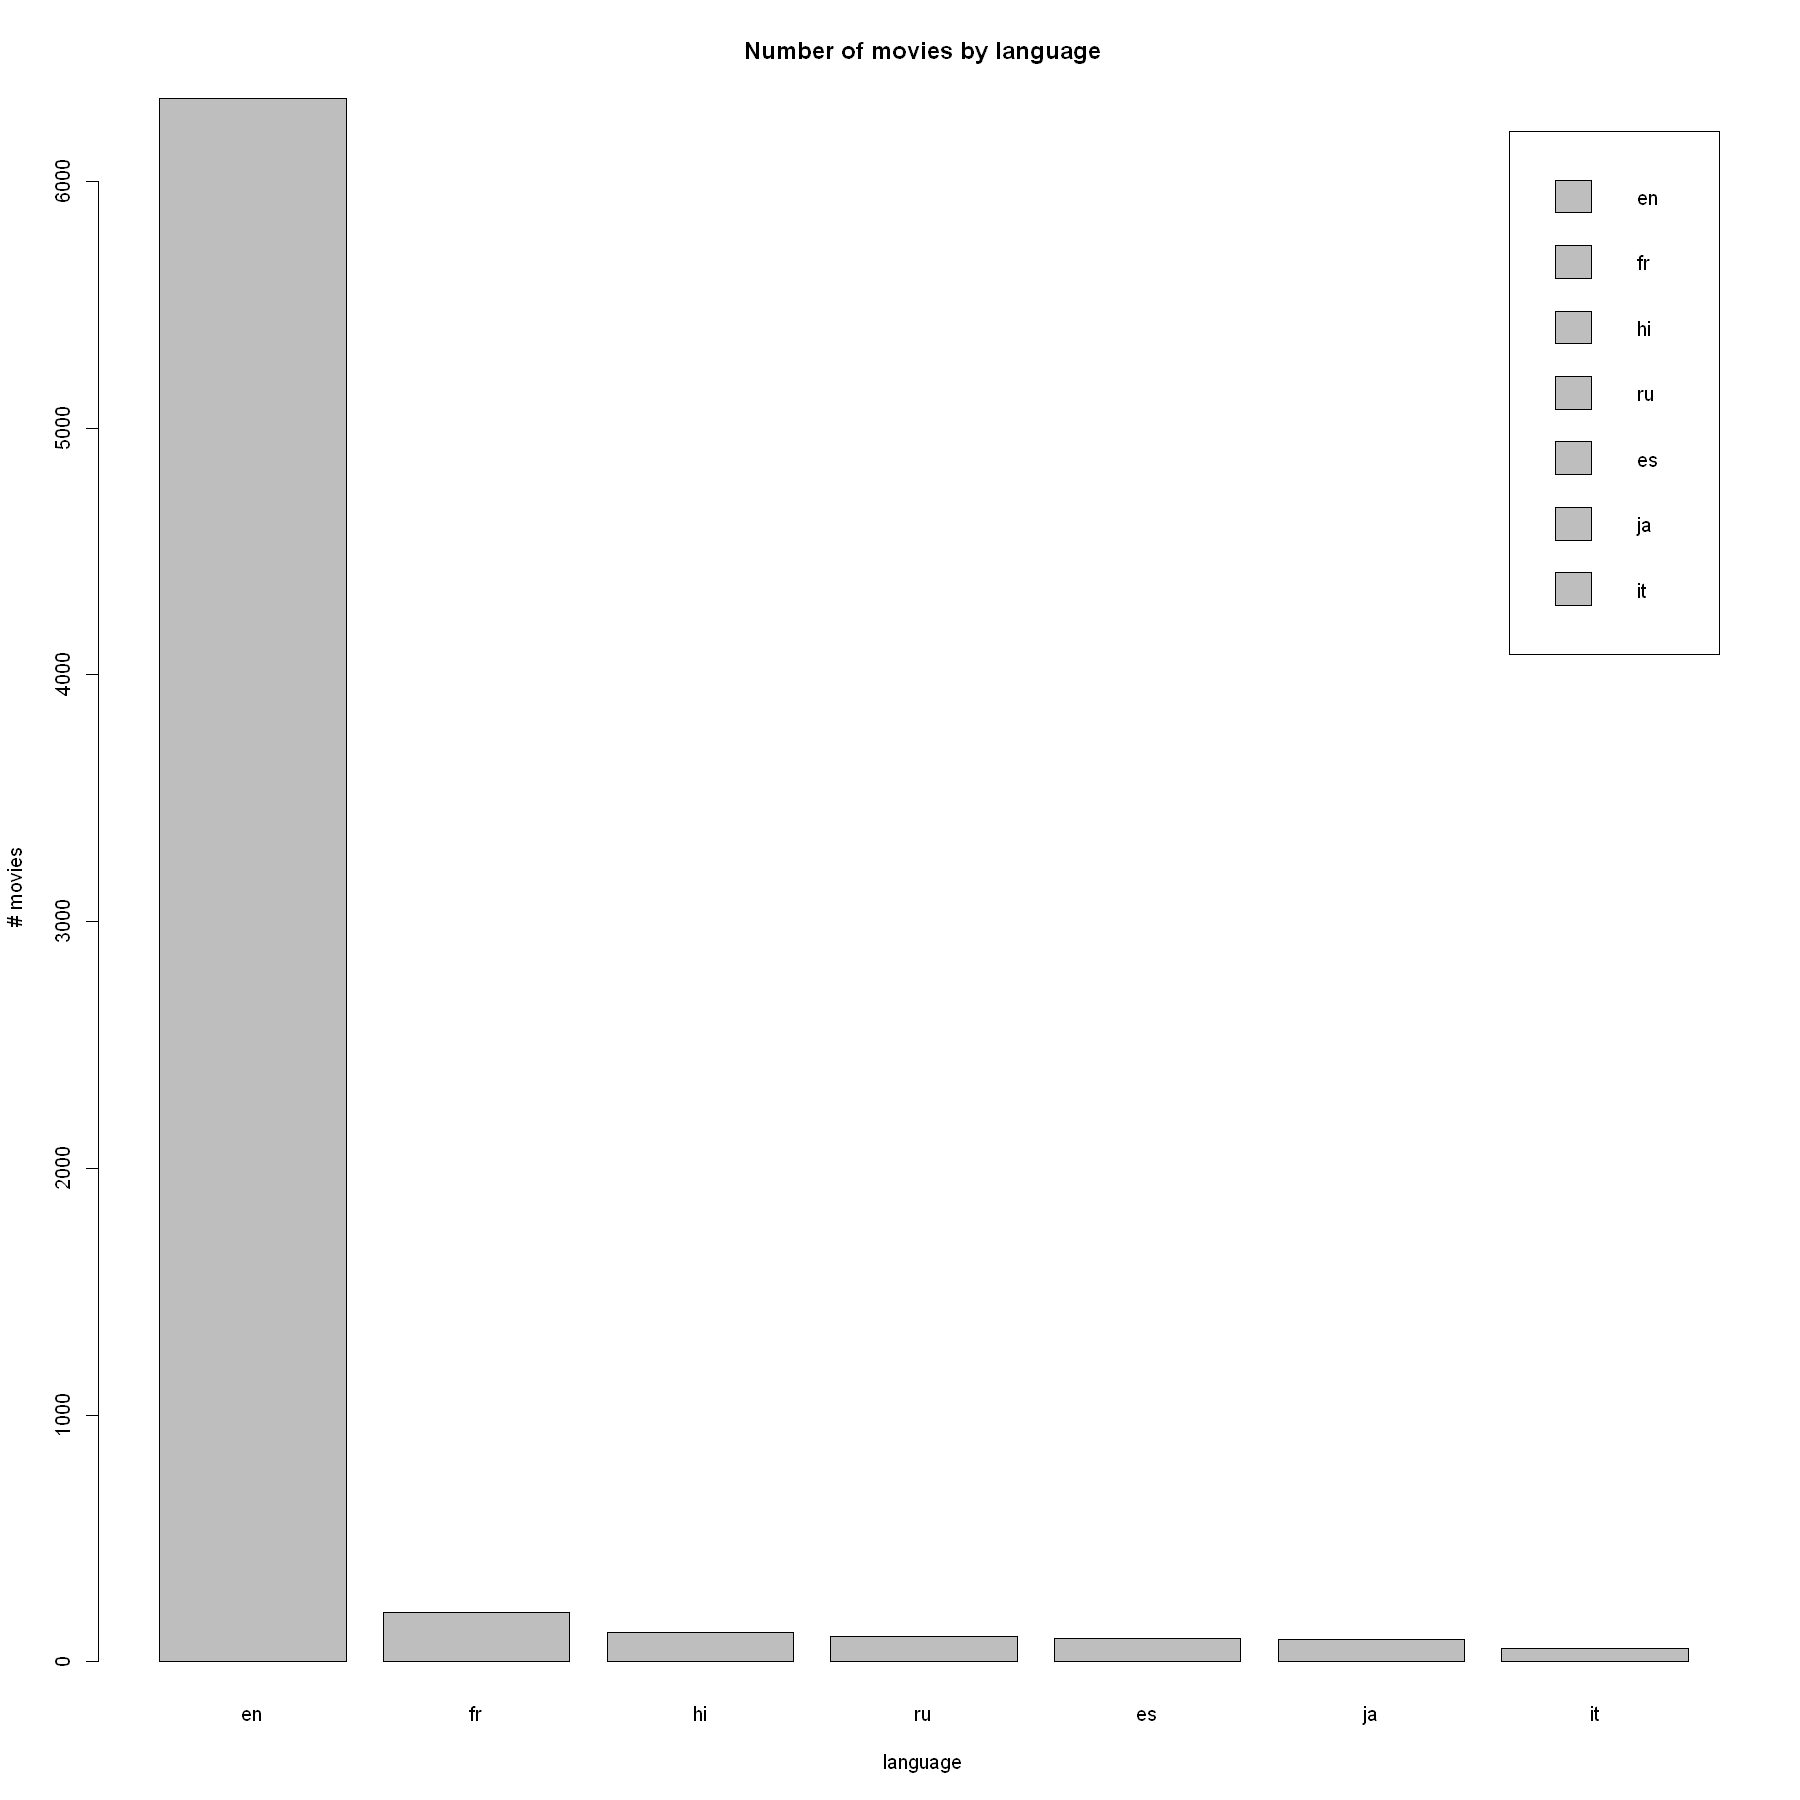

In [11]:
#language original
lang_count <- movies_ff %>% group_by(original_language) %>% summarise(n=n()) %>% arrange(desc(n)) %>% top_n(7)
barplot(lang_count$n,main="Number of movies by language",legend.text = lang_count[[1]], names.arg = lang_count[[1]] ,xlab="language",ylab="# movies")

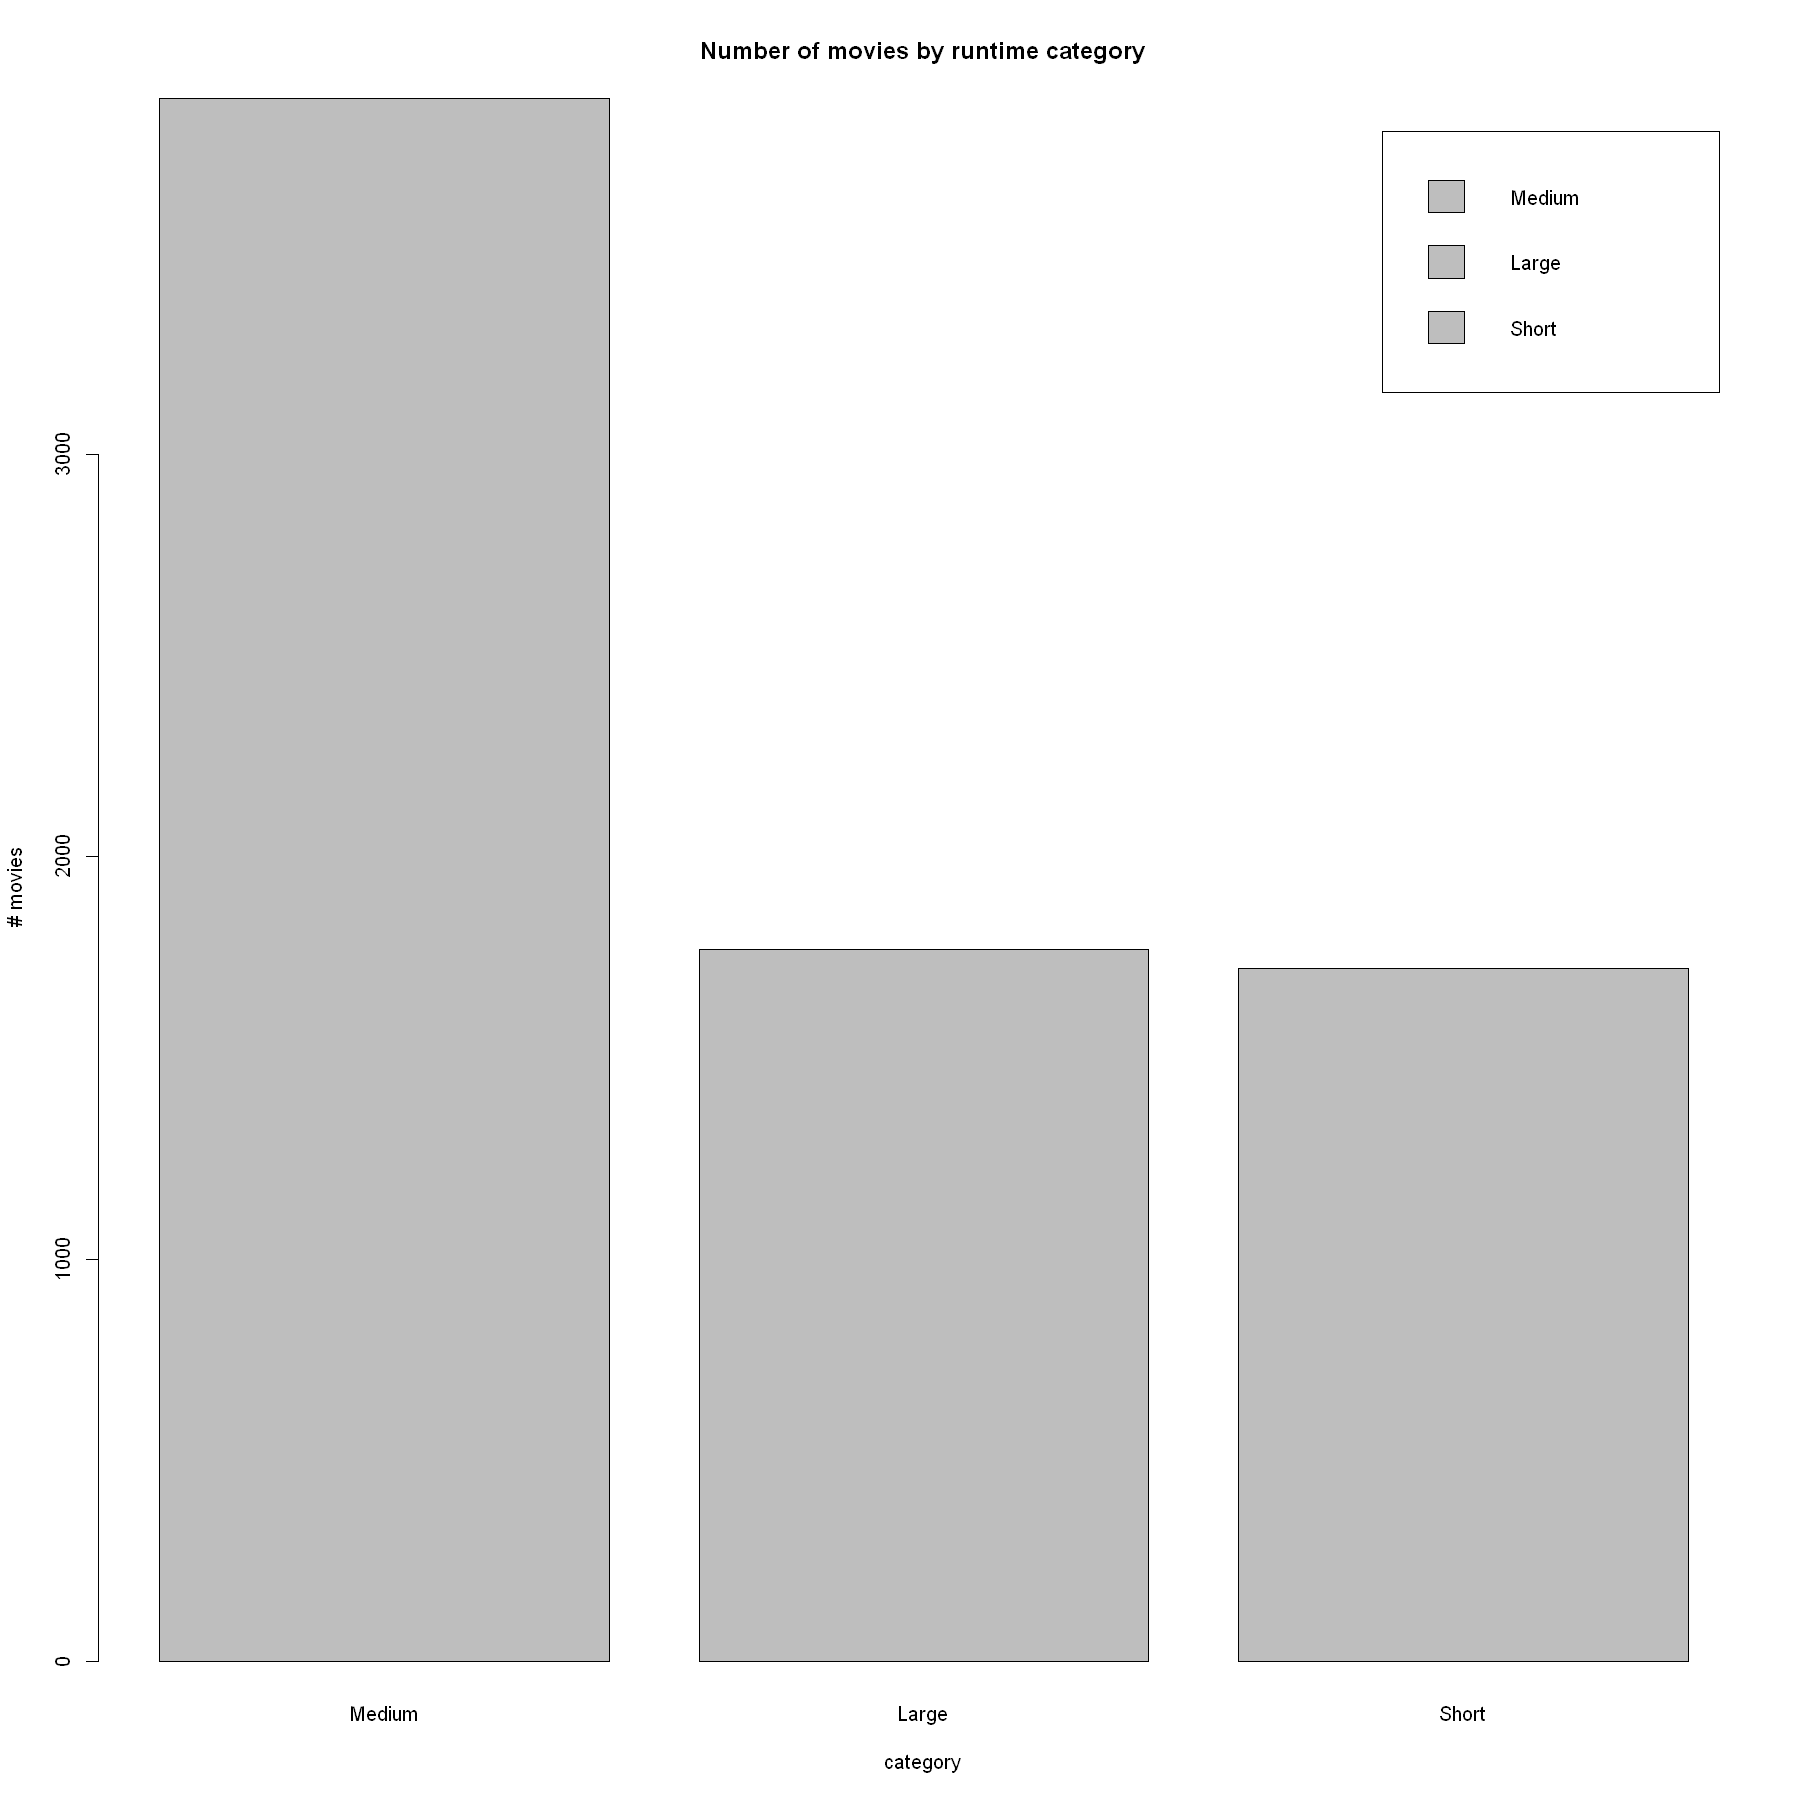

In [14]:

#runtime category
runtime_count <- movies_ff %>% group_by(runtime_cat) %>% summarise(n=n()) %>% arrange(desc(n))
barplot(runtime_count$n,main="Number of movies by runtime category",legend.text = runtime_count[[1]], names.arg = runtime_count[[1]] ,xlab="category",ylab="# movies")

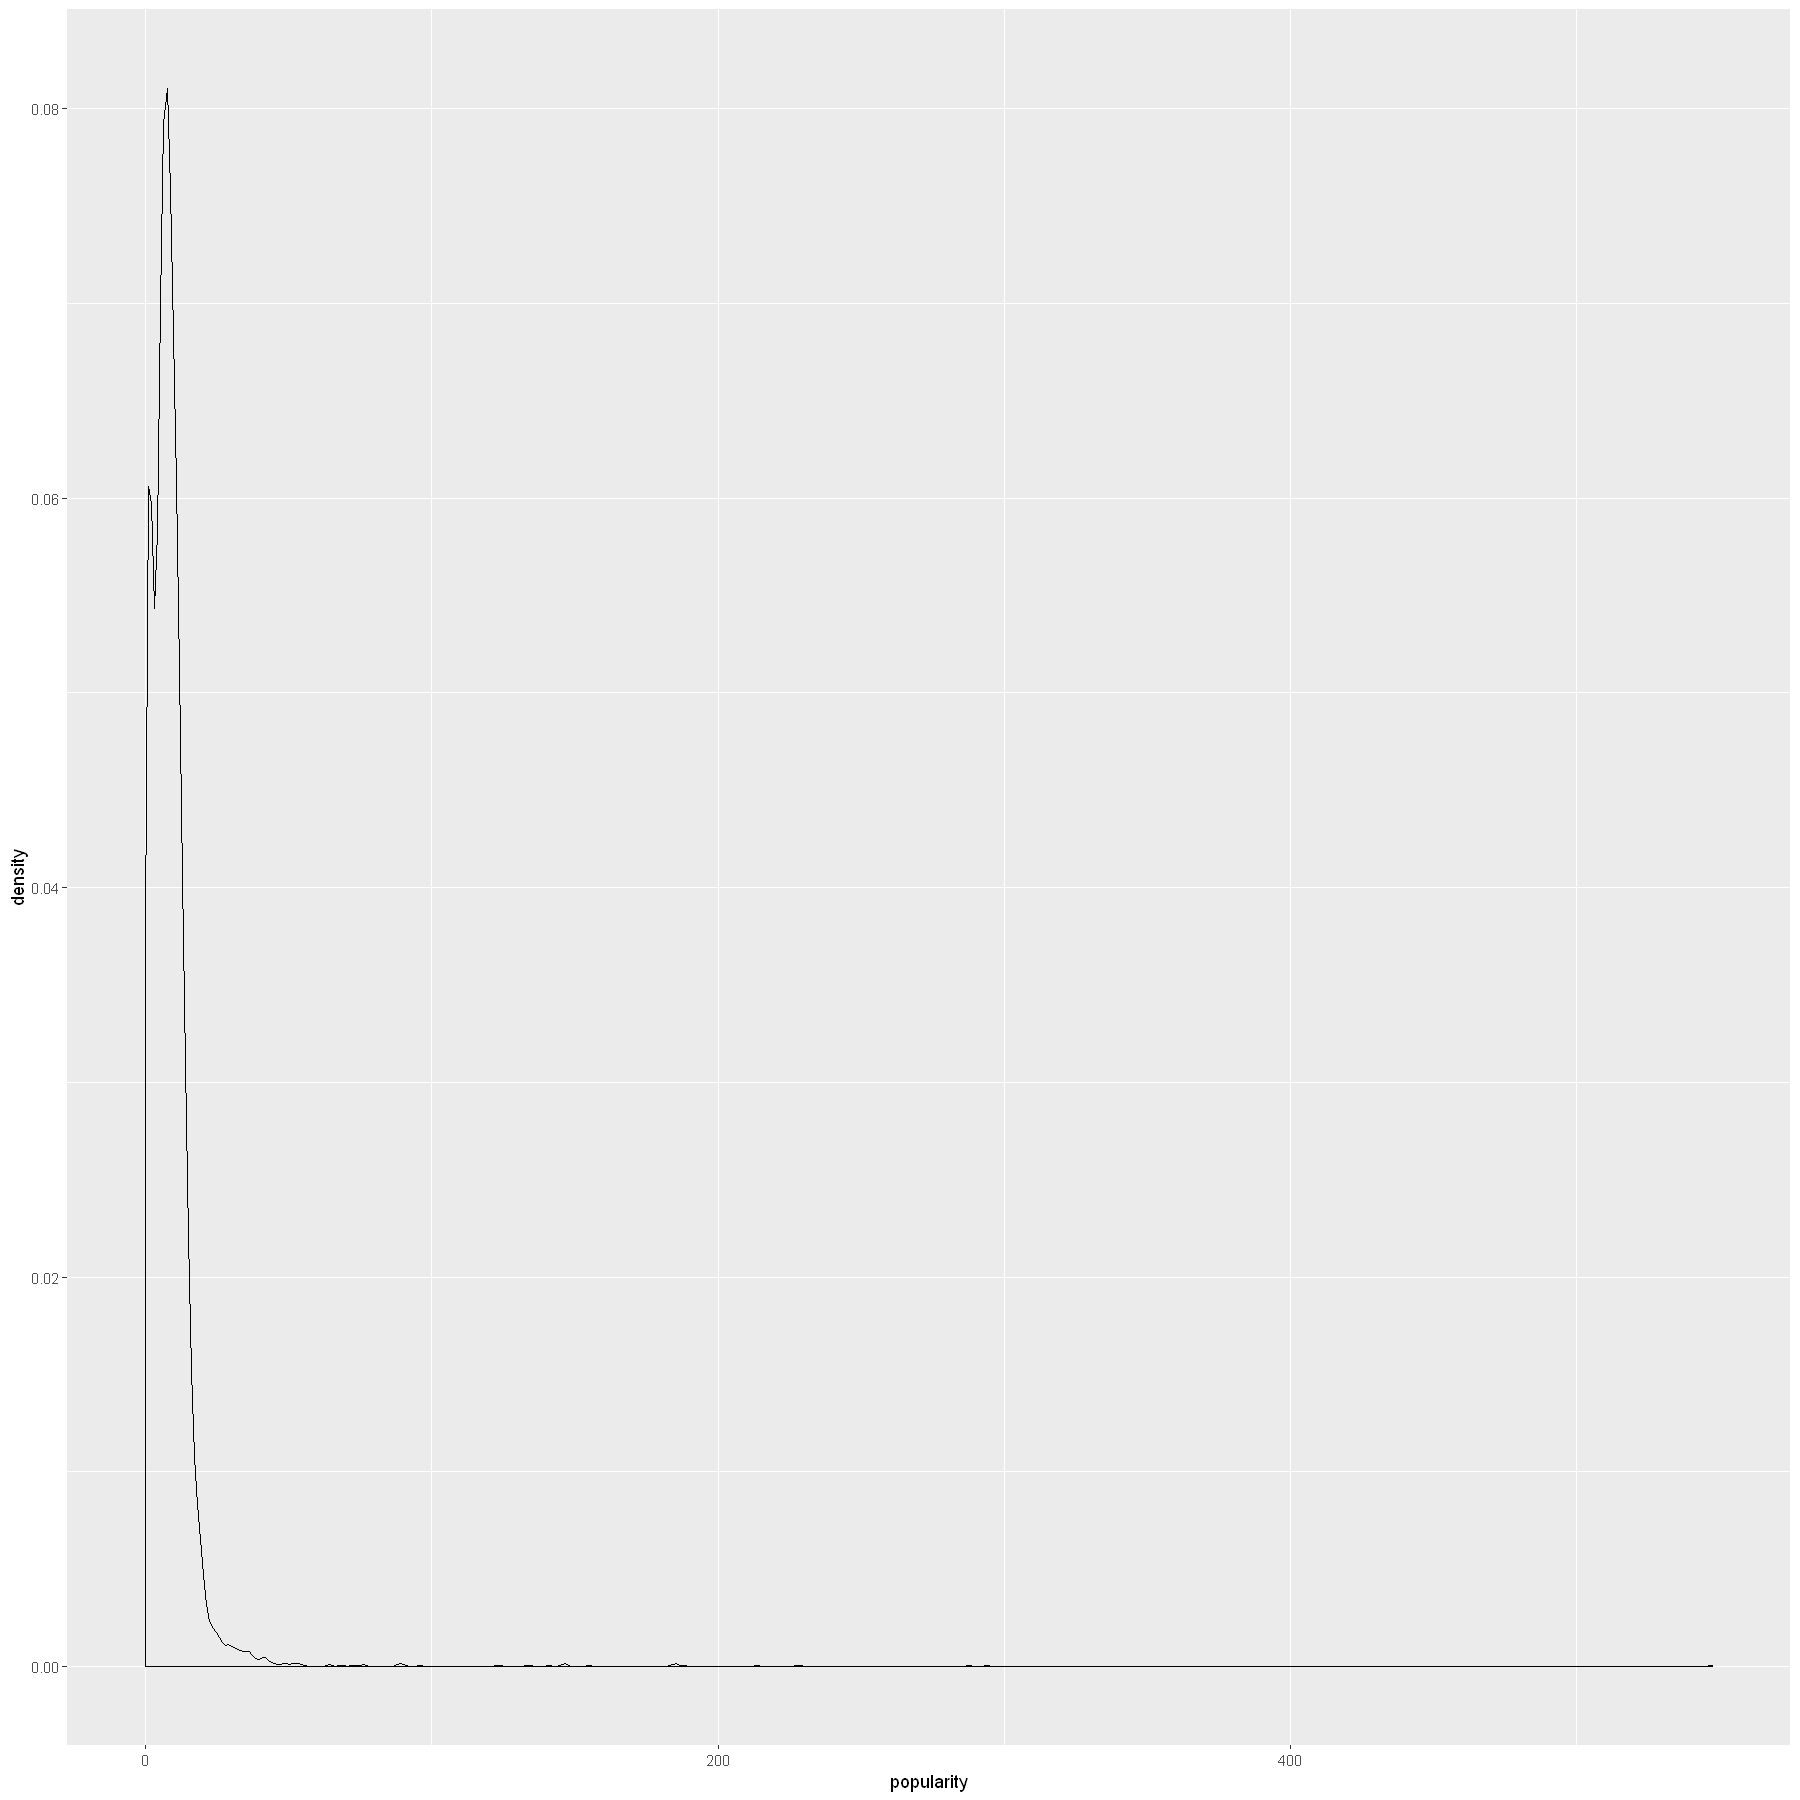

In [16]:
### popularity
ggplot(data=movies_ff) +
    geom_density(aes(popularity))


1918 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 
   1    1    1    1    1    6    2    3    5    1    2    4    3    6    3    5 
1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 
   6    2    3    6    5    6    6    2    7    6    4    2    9    5    6    9 
1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 
   7   11   14   10   13    7    8   10   14   16   15   15   14   12   15   24 
1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 
  23   15   23   20   16   23   19   25   22   29   43   40   59   65   67   79 
1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 
  78   94  102  112  132  102  104  116  116  138  123  134  138  158  152  158 
2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 
 155  175  197  178  208  234  280  257  265  284  304  311  304  334  319  312 
2016 2017 
 300   98 

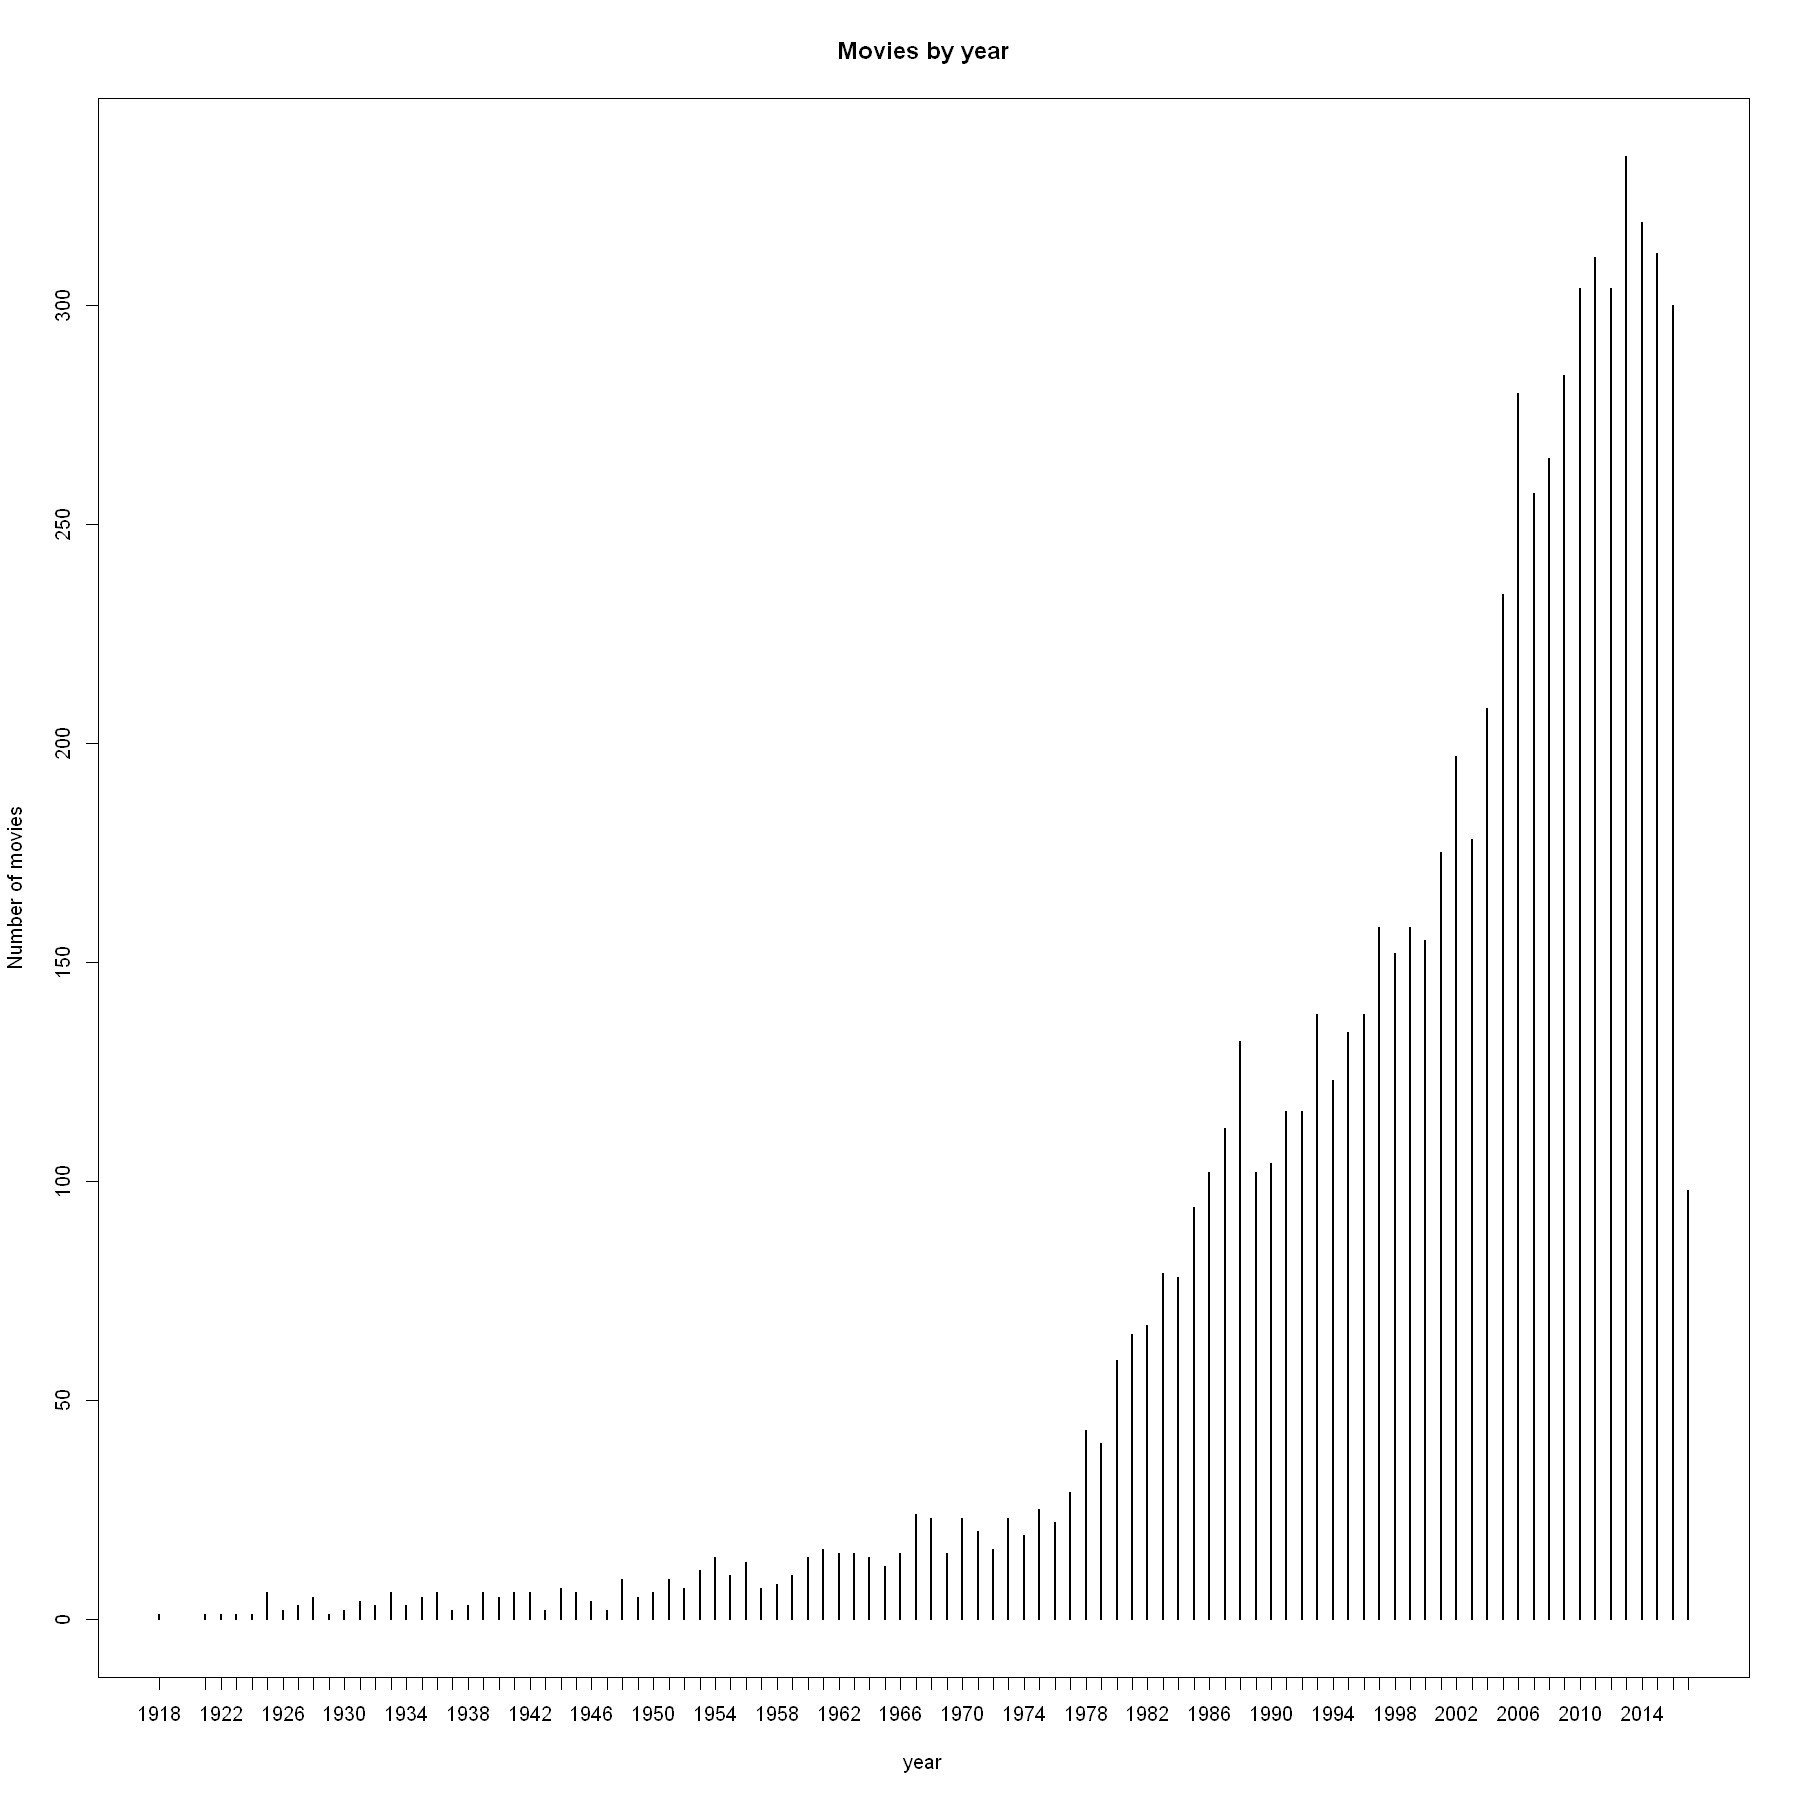

In [18]:
#release date
table(year(movies_ff$release_date))
plot(table(year(movies_ff$release_date)),ylab="Number of movies",xlab="year",main="Movies by year")

In [21]:
movies_ff %>% group_by(sw_lang_en) %>% summarise(n=n())
movies_ff %>% group_by(sw_web_presence) %>% summarise(n=n())
movies_ff %>% group_by(sw_has_poster) %>% summarise(n=n())
movies_ff %>% group_by(sw_tagline) %>% summarise(n=n())
movies_ff %>% group_by(high_release_month) %>% summarise(n=n())


sw_lang_en,n
<int>,<int>
0,1039
1,6336


sw_web_presence,n
<int>,<int>
0,5012
1,2363


sw_has_poster,n
<int>,<int>
0,2
1,7373


sw_tagline,n
<int>,<int>
0,1442
1,5933


high_release_month,n
<int>,<int>
0,4427
1,2948



  1   2   3   4   5   6   7   8   9  10  11  12 
510 518 561 557 582 594 564 657 902 695 540 694 

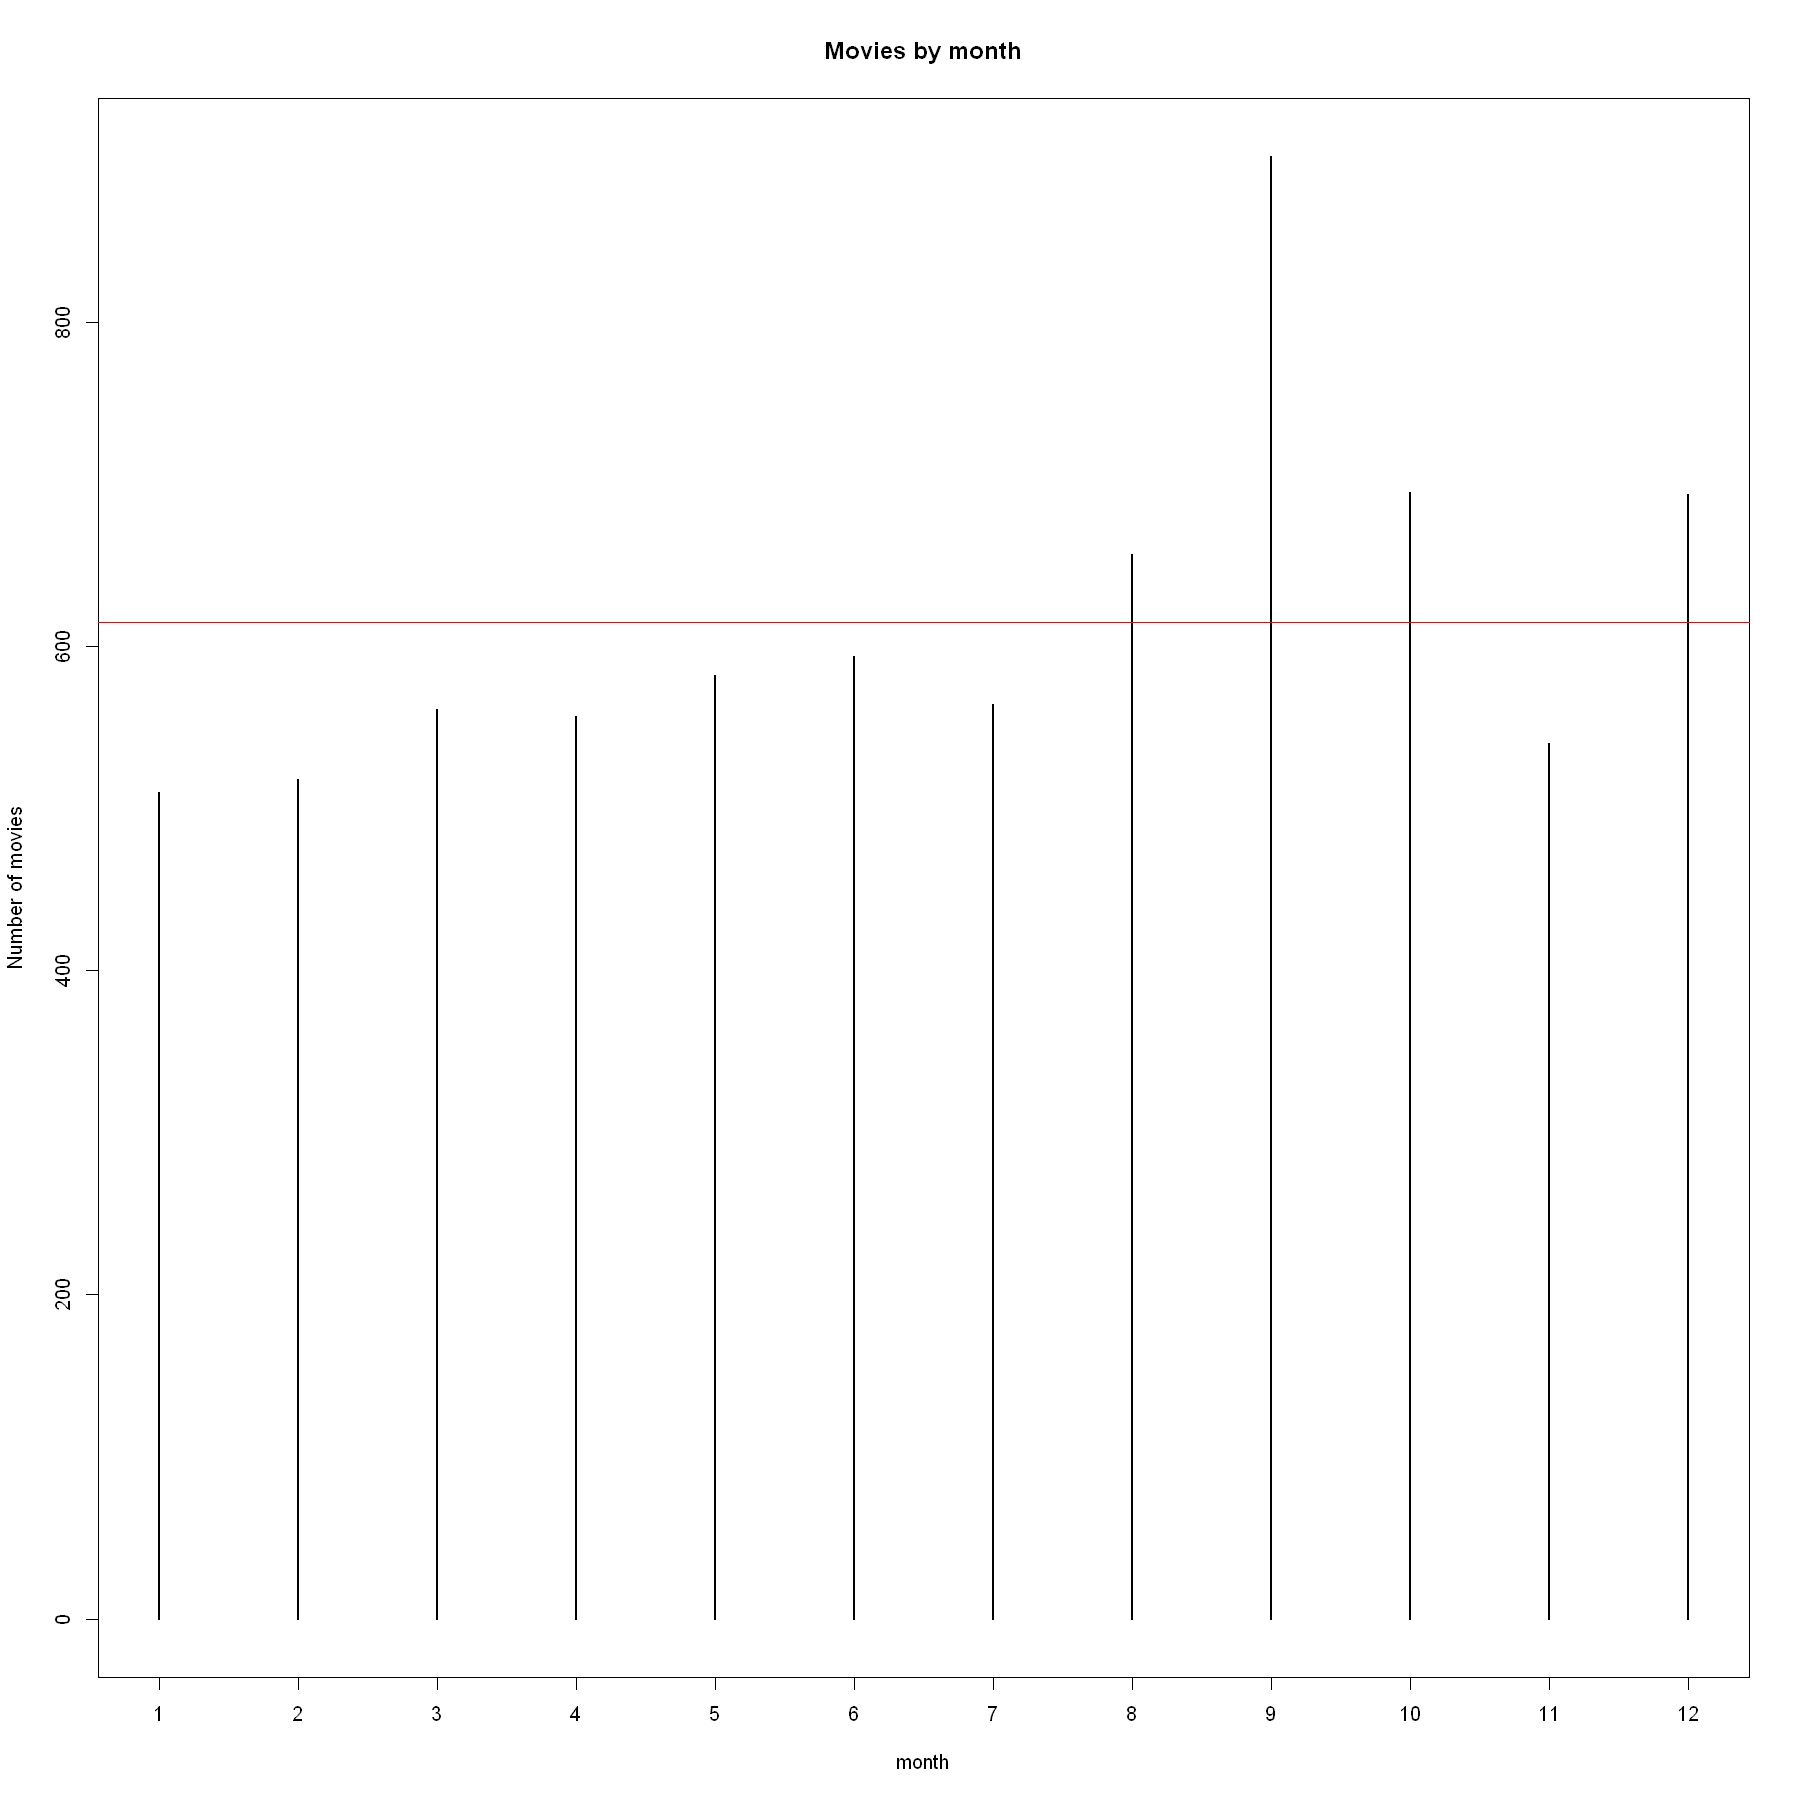

In [22]:
table(month(movies_ff$release_date))
plot(table(month(movies_ff$release_date)), ylab="Number of movies",xlab="month",main="Movies by month")
abline(h=mean(table(month(movies_ff$release_date)),na.rm=T),col="red")

[1] 7.264949

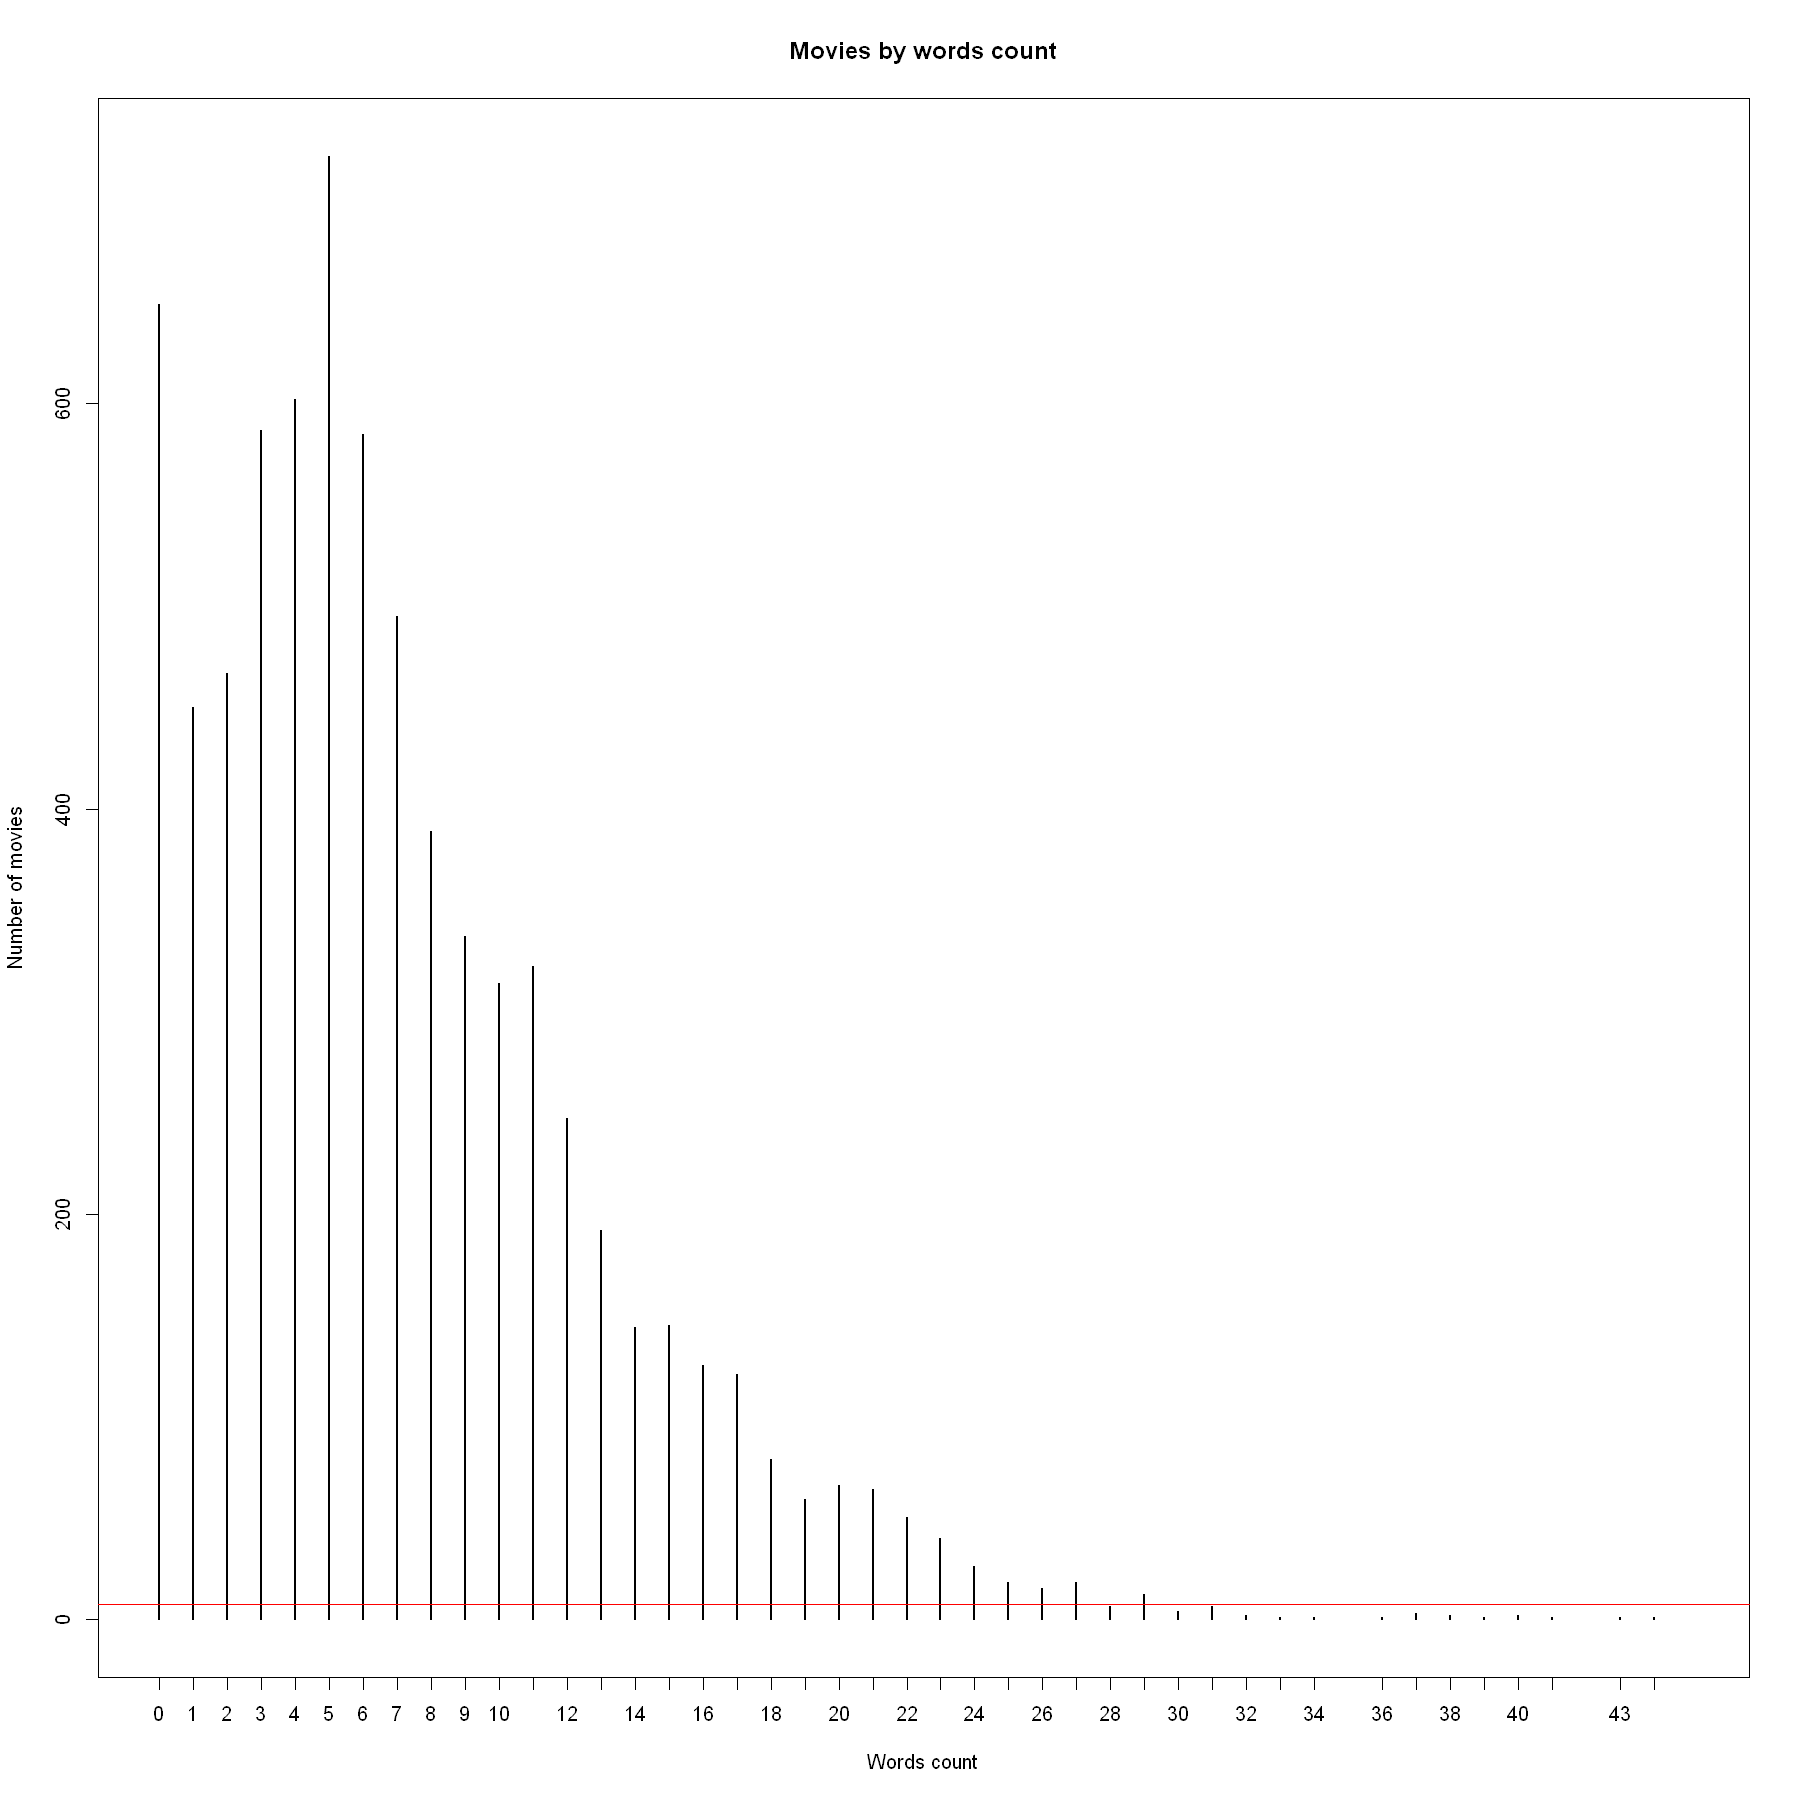

In [27]:
plot(table(movies_ff$keyword_cnt),ylab="Number of movies",xlab="Words count",main="Movies by words count",xlim=c(0,45))
abline(h=mean(movies_ff$keyword_cnt),col="red")
mean(movies_ff$keyword_cnt)

In [39]:
### differences between the average revenue by language?
movies_ff %>% 
    group_by(original_language) %>% 
    summarise(revenue_avg=mean(revenue,na.rm=T), revenue_sd=sd(revenue,na.rm=T),n=n()) %>% 
    arrange(desc(n))

original_language,revenue_avg,revenue_sd,n
<chr>,<dbl>,<dbl>,<int>
en,74781023.5,146000315.8,6336
fr,17132565.7,51746646.0,199
hi,25346368.7,49616798.9,118
ru,7227709.7,12086653.5,105
es,8564790.2,13620381.7,95
ja,30651798.8,32415933.6,90
it,16927302.3,47183421.9,55
de,20530900.6,30979114.7,49
ko,13776704.3,21344783.6,48


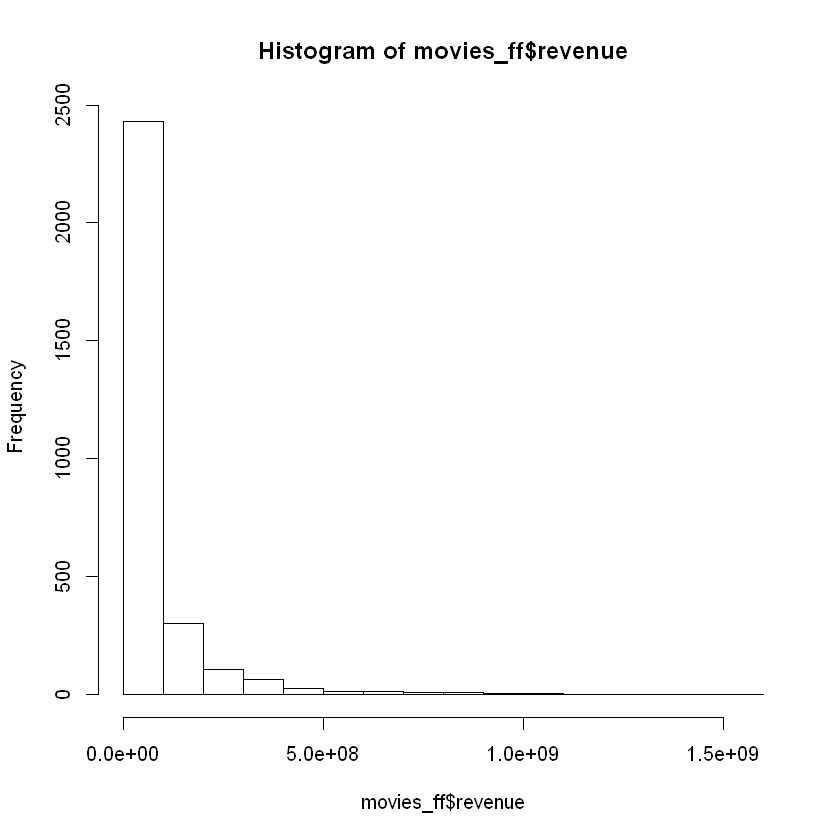

In [45]:
hist(movies_ff$revenue)

Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."


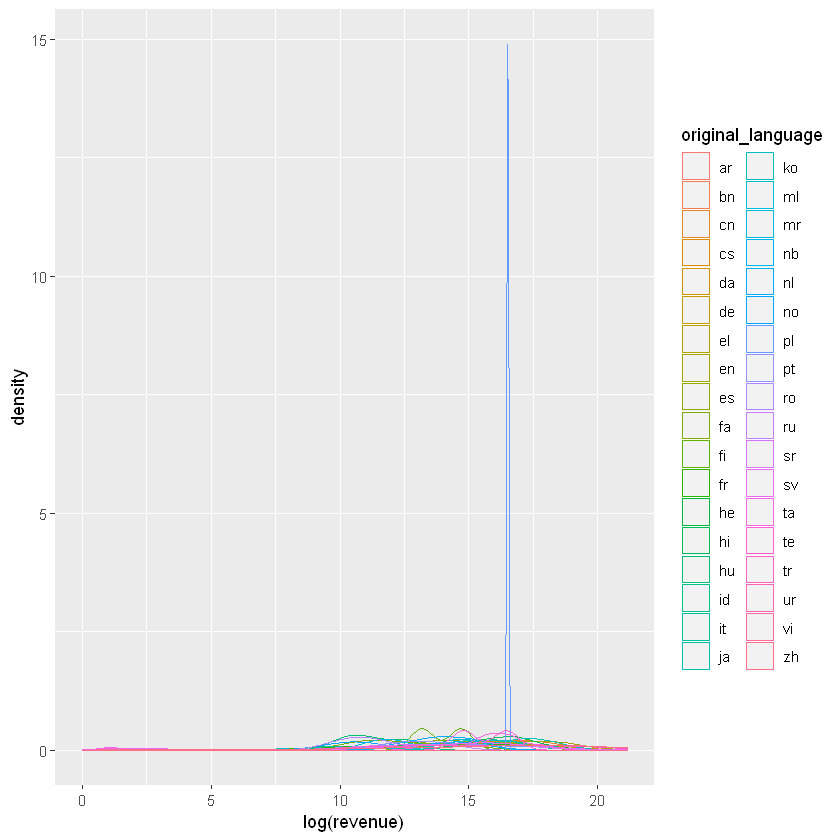

In [47]:
ggplot(data=movies_ff) +
    geom_density(aes(log(revenue), group=original_language, color=original_language))

Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."
Warning message:
"Groups with fewer than two data points have been dropped."


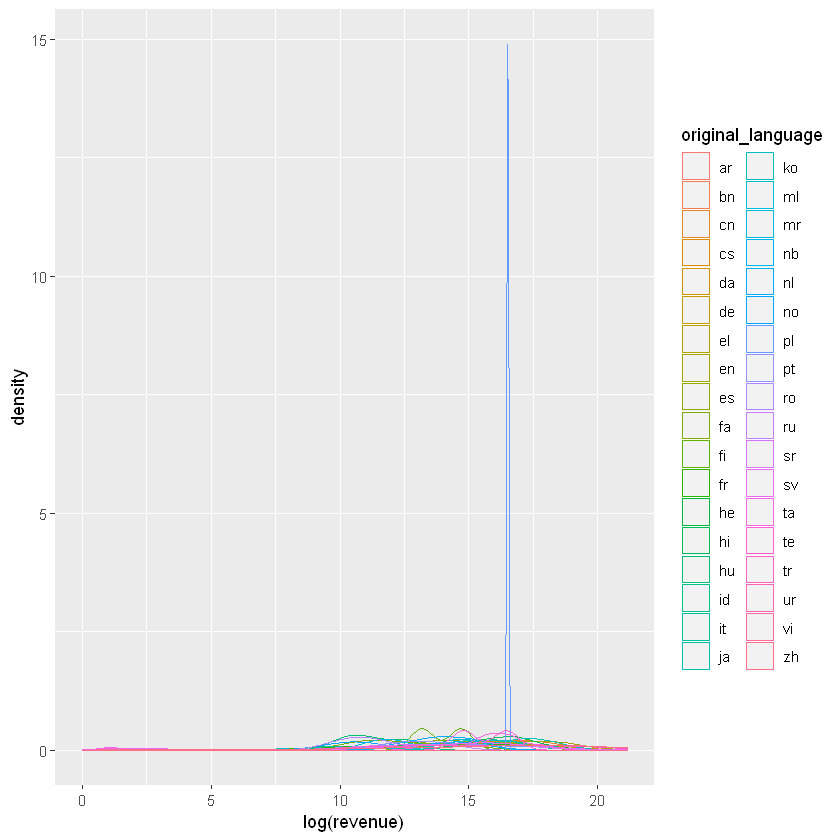

In [55]:
movies <- movies_ff %>% 
    mutate(orig_lang2=ifelse(original_language %in% c("en","fr","in","ru","es","ja"),original_language,'other'))

In [56]:
movies %>% 
    group_by(orig_lang2) %>% 
    summarise(revenue_avg=mean(revenue,na.rm=T), revenue_sd=sd(revenue,na.rm=T),n=n()) %>% 
    arrange(desc(n))

orig_lang2,revenue_avg,revenue_sd,n
<chr>,<dbl>,<dbl>,<int>
en,74781024,146000316,6336
other,21661090,47864635,550
fr,17132566,51746646,199
ru,7227710,12086653,105
es,8564790,13620382,95
ja,30651799,32415934,90


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."


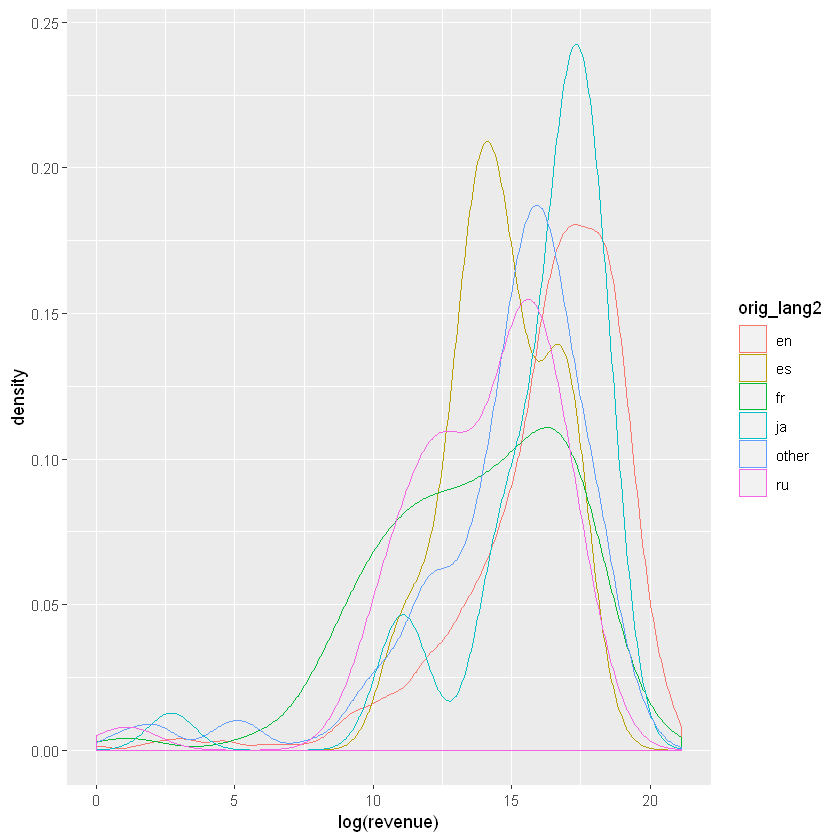

In [57]:
ggplot(data=movies) +
    geom_density(aes(log(revenue), group=orig_lang2, color=orig_lang2))